# Scraping of Crypto Coins on Cryptocompare using Python & Selenium

*Using Python, Requests and Selenium- Extracting the details of top 100 crypto assets from each category based on their Market Capitalization from the website [Cryptocompare](https://www.cryptocompare.com)*

![](https://i.imgur.com/yiAseDS.jpeg)

_Image credits - [New digital coins](https://www.silverqp.com/2021/09/new-digital-coins.html) from [Silverqp](https://www.silverqp.com/)_

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="Final-Cryptocompare-selenium-webscraping-project")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/sanjaynycws/final-cryptocompare-selenium-webscraping-project


'https://jovian.ai/sanjaynycws/final-cryptocompare-selenium-webscraping-project'

# ***`What is Web Scraping...?`***

Web Scraping is an automatic method to obtain large amounts of data from websites. Most of this data is `unstructured data in an HTML format` which is then converted into `structured data in a spreadsheet or a database` in a `JSON` or `CSV format`. 

![](https://prowebscraping.com/wp-content/uploads/2015/09/data-scraping-service.jpg)

_Image credits - [http://prowebscraping.com/](http://prowebscraping.com/)_

#### Below are few sources where webscraping can be used

![](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1587503051/web1_jpfixv.png)

_Image credits - [https://www.cloudinary.com/](https://www.cloudinary.com/)_


# ***`What is Cryptocurrency...?`***
# ***`What is De-Fi...?`***              
# ***`What is NFT...?`***

![](https://miro.medium.com/max/1400/0*ES_NtpZqcP7YHgOo.png)

_Image credits - [https://www.medium.com](https://medium.com/copuppy-bsc/copuppy-multi-elements-of-defi-nft-metaverse-b988fe5d9bb6)_


The high volatility of the blockchain markets has driven the attention of investors and market participants to concentrate on the diversification avenues of `Non-Fungible Tokens (NFTs)` and `Decentralized Financial Assets (DeFis)Tokens`, and `Cryptocurrencies`. NFTs are about individual digital assets. DeFi, on the other hand, is about the Internet-based financial system.

A `cryptocurrency`, `crypto-currency`, or `crypto` is a digital asset designed to work as a medium of exchange wherein individual coin ownership records are stored in a ledger existing in a form of a computerized database using strong cryptography to secure transaction records, to control the creation of additional coins, and to verify the transfer of coin ownership. 

`Decentralized finance(DeFi)` is an emerging financial technology based on secure distributed ledgers similar to those used by cryptocurrencies. The system removes the control banks and institutions have on money, financial products, and financial services. `Non-fungible- token(NFT)` is a digital asset that represents Internet collectibles like art, music, and games with an authentic certificate created by blockchain technology that underlies Cryptocurrency. It can neither be replaced nor interchanged because it has unique properties. 

`Bitcoin`, first released as open-source software in 2009, is often called the first decentralized cryptocurrency. Since then, over 4,000 cryptocurrencies (sometimes called `'altcoins'`, which is short for alternative coins) have been created.

To learn more about the Cryptocurrencies visit [https://www.investopedia.com/](https://www.investopedia.com/)

_Source_: [https://simple.wikipedia.org/wiki/Cryptocurrency](https://simple.wikipedia.org/wiki/Cryptocurrency),

#### An Overview of the Website [Cryptocompare](https://www.cryptocompare.com/coins/list/all/USD/1)
![](https://miro.medium.com/max/1400/1*1Q67Svfsj5g5vuwbZckvGg.png)

**CryptoCompare** is a website that offers a number of services related to cryptocurrency trading, mining, and storage for both institutional and retail investors. CryptoCompare provides real-time, high-quality and reliable market and pricing data on 5,700+ coins and 2,60,000+ currency pairs globally, bridging the gap between the crypto assets and traditional financial markets. 

By aggregating and analysing tick data from globally recognised exchanges, and seamlessly integrating different datasets in the cryptocurrency price. At a granular level, they provide: cryptocurrency trade data, order book data, blockchain and historical data, social data, reports and a suite of cryptocurrency indices.The platform brings live prices, charts and market analysis from crypto exchanges worldwide. 

Crypto Coin Comparison LTD, the company behind CryptoCompare, was founded in the United Kingdom in 2014 by Charles Hayter and Vlad Cealicu. The platform was introduced to the public at the end of July 2015. 

To know more about the Cryptocompare visit
[https://www.marketswiki.com/wiki/CryptoCompare](https://www.marketswiki.com/wiki/CryptoCompare)

[https://www.cryptocompare.com/about-us/](https://www.cryptocompare.com/about-us/)

# Objectives of the project

- We are going to scrape https://www.cryptocompare.com/coins/list/all/USD/1
- We will get a list of Coins from each tab of Crypto assets.
- For each coin, We will get Ranking, Coin name, Coin URL, Price, Direct Volume, Total Volume, Top-Tier Volume, Market Cap, Rating and % Chg. 
- We will return all the extracted values into a dictionary and then to create a data frame. 
- From Data Frame, we will create a CSV file in the following format:

![](https://i.imgur.com/13eCs9M.jpg)

#### Functions Index
1. ***Function 1*** - To extract all the 3 crypto asset tabs like **Cryptocurrencies, De-fi, and NFT** from the home page which contain a coin list of top 100 coins in each tab category. 

2. ***Function 2*** - A set of helper functions to extract details from the `Tr tags` of first tab-  cyrptocurrencies' like **serial number, name, price in USD and URL etc** for top 100 coins.  

3. ***Function 3*** - Inorder to keep consistency, writing a function that will extract all the details from function 2 and return a dictionary. 

4. ***Function 4*** - Merging the all the details in a Data Frame and saving it to a csv file.  



## Experimenting with `Beautifulsoup` 
Lets check if we can scrape the data using `bs4` library- Importing `requests` and using `.get` to download the webpage. 


In [ ]:
import requests
CRYPTO_COMPARE_URL = 'https://www.cryptocompare.com/coins/list/all/USD/1'
response = requests.get(CRYPTO_COMPARE_URL)
print(len(response.text))
print('Status Code', response.status_code)
print('Output', response.text[:1000])

218499
Status Code 200
Output 
<!DOCTYPE html>
<html ng-app="ccc-app" class="" ng-class-for-lights>
<head ng-controller="HeaderSEOCtrl">
<title>Coin Market Capitalization lists of Crypto Currencies and prices , Lives streaming Bitcoin &amp; Ethereum Market Cap and all other crypto currencies. | CryptoCompare.com</title>
<meta name="viewport" content="width=device-width, initial-scale=1.0" />
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<meta http-equiv="content-type" content="text/html; charset=utf-8" />
<meta name="description" content='Live streaming prices and the market capitalization of all cryptocurrencies such as bitcoin and Ethereum. View and analyze over 1600 cryptocurrencies from over 80 exchanges! Streaming price, forum, historical charts, technical analysis, social data market analysis of BTC and ETH prices.' />
<link rel="icon" href="/media/20562/favicon.png?v=11" type="image/png">
<link rel="apple-touch-icon" href="/media/20562/favicon.png?v=11">
<meta name="twit

In [ ]:
#Writing the Page contents to a .html file
with open('Coinslist.html', 'w') as f:
    f.write(response.text)

In [ ]:
from bs4 import BeautifulSoup
doc = BeautifulSoup(response.text, 'html.parser')
print('Page title:', doc.title.text)

Page title: Coin Market Capitalization lists of Crypto Currencies and prices , Lives streaming Bitcoin & Ethereum Market Cap and all other crypto currencies. | CryptoCompare.com


In [ ]:
#Finding all the div class for serial number
coin_serial = doc.find_all('ng-binding')
len(coin_serial)

0

In [ ]:
#Find all the Coin divs
coin_divs = doc.find_all('tr', class_='ng-scope')
print(f'Found {len(coin_divs)} coins')

Found 0 coins


## Using `Selenium`
Unable to fetch data with `bs4`,   since its a dynamic website,  and hence using `selenium` by installing in-built library `kora` to import `webdrivers` 

In [ ]:
#Importing wd, By and sleep from selenium
!pip install kora -q
from kora.selenium import wd
from selenium.webdriver.common.by import By
import time
from time import sleep



Using `wd.get` to simulate the webpage URL which allows us to access and inspect the HTML elements

Page title: Coin Market Capitalization lists of Crypto Currencies and prices , Lives streaming Bitcoin & Ethereum Market Cap and all other crypto currencies. | CryptoCompare.com


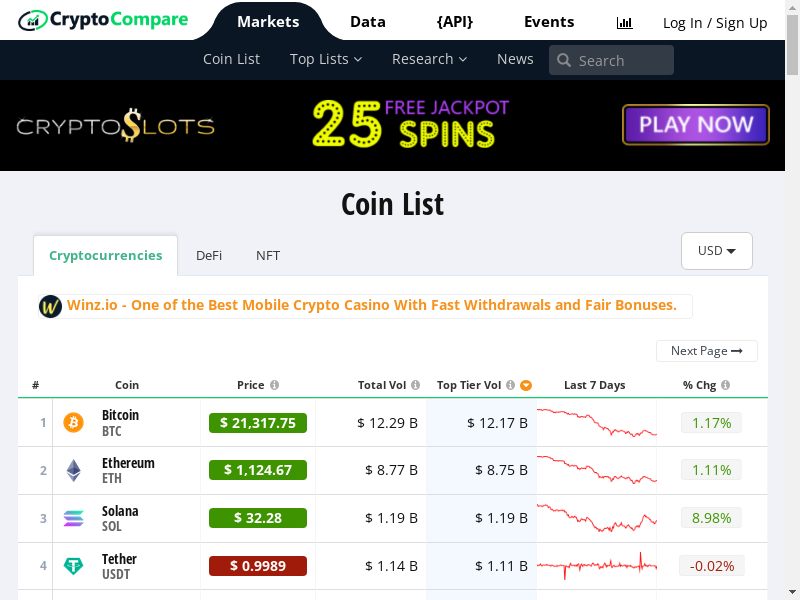

In [ ]:
import requests
requests.get("https://www.cryptocompare.com/coins/list/all/USD/1").status_code
wd.get("https://www.cryptocompare.com/coins/list/all/USD/1")
wd.title
print('Page title:', wd.title)
wd



Defining a function to get the status response 

In [ ]:
def check_status_code(url):

  #We use requests.get to download the content from a webpage
  response = requests.get(url)

  # checking the status of the response by response.status_code .
  # A Valid url status code ranges between 200 to 299
  if not response.ok:
     raise Exception ('Failed to fetch the webpage')
  
  return response.status_code
check_status_code("https://www.cryptocompare.com/coins/list/all/USD/1")  

200

## Printing the first 1000 web elements of the page source. 

In [ ]:
print(wd.page_source[:1000]) 

<html ng-app="ccc-app" class="ng-scope lights-on other" ng-class-for-lights=""><head ng-controller="HeaderSEOCtrl" class="ng-scope"><style type="text/css">@charset "UTF-8";[ng\:cloak],[ng-cloak],[data-ng-cloak],[x-ng-cloak],.ng-cloak,.x-ng-cloak,.ng-hide:not(.ng-hide-animate){display:none !important;}ng\:form{display:block;}.ng-animate-shim{visibility:hidden;}.ng-anchor{position:absolute;}</style>
<title>Coin Market Capitalization lists of Crypto Currencies and prices , Lives streaming Bitcoin &amp; Ethereum Market Cap and all other crypto currencies. | CryptoCompare.com</title>
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<meta http-equiv="content-type" content="text/html; charset=utf-8">
<meta name="description" content="Live streaming prices and the market capitalization of all cryptocurrencies such as bitcoin and Ethereum. View and analyze over 1600 cryptocurrencies from over 80 exchanges! Streaming pri

#### Importing `Web Drivers` and using `XPath` technique which allows to navigate the structure of a webpage to locate `HTML` elements with ease

In [ ]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
coinlist_url = WebDriverWait(wd, 10).until(EC.presence_of_all_elements_located((By.XPATH, '//*[@class="nav nav-tabs nav-wallets"]')))
coinlist1_url= coinlist_url[0]
coinlist1_url

<ul class="nav nav-tabs nav-wallets">
			<li role="presentation" ng-class="{'active': asset === 'all'}" class="active">
				<a href="/coins/list/all/USD/1">Cryptocurrencies</a>
			</li>
			<li role="presentation" ng-class="{'active': asset === 'defi'}">
				<a href="/coins/list/defi/USD/1">DeFi</a>
			</li>
			<li role="presentation" ng-class="{'active': asset === 'nft'}">
				<a href="/coins/list/nft/USD/1">NFT</a>
			</li>
			<li class="coin-dropdown">
				<div class="btn-group dropdown" uib-dropdown="" is-open="status.isopen">
				  <button id="single-button" type="button" class="btn btn-default btn-lg btn-block btn-resp-menu ng-binding dropdown-toggle" uib-dropdown-toggle="" ng-disabled="disabled" aria-haspopup="true" aria-expanded="false">
					USD <span class="caret"></span>
				  </button>
				  <ul class="dropdown-menu" uib-dropdown-menu="" role="menu" aria-labelledby="single-button">
					 <!-- ngRepeat: (tabId,navTab) in acceptedTabs --><!-- ngIf: acceptedTabs[tabId].Key !== 

#### Getting URL's for the 3 asset classes 


In [ ]:
#Helper function to access all the 3 tabs of crypto assets 
coinlist2_url = coinlist1_url.find_elements(By.TAG_NAME, "a")
def get_coinstab(coinlist2_url):
    new_list = []
    for i in coinlist2_url[:3]:
        new_list.append(i['href'])
    return new_list   
coinstab = get_coinstab(coinlist2_url)
coinstab


['https://www.cryptocompare.com/coins/list/all/USD/1',
 'https://www.cryptocompare.com/coins/list/defi/USD/1',
 'https://www.cryptocompare.com/coins/list/nft/USD/1']

Checking the status code for all the links

In [ ]:
status_code =[]
for tab in coinstab:
  status_code.append(check_status_code(tab))
status_code

[200, 200, 200]

## Extracting the Data from `Cryptocurrency` tab and accessing `<tr>` tags to find sub-elements and then writing helper function to retrieve data from the `Defi` and `NFT` tabs as well

In [ ]:
#Finding the number of coins in the first tab
#print('Get the coin tags')
tr_tags = wd.find_elements(By.TAG_NAME, "tr")
print(f'Found {len(tr_tags)} coins')

Found 101 coins


![](https://i.imgur.com/wtCG0MK.png)

Extracting the data from 1st Coin to access all tags/HTML elements and then scraping data for all coins with helper functions


In [ ]:
tr1= tr_tags[1]
coin_serial = tr1.find_element(By.CLASS_NAME,"place")
print(coin_serial.text)


1


In [ ]:
#Helper function to get rank
def get_rank(tags_tr):
    ranking = []
    for tag in tags_tr:
        ranking.append(tag.find_element(By.CLASS_NAME,"place").get_attribute("textContent").strip()) 
    return ranking
get_rank(tr_tags[1:6])        

['1', '2', '3', '4', '5']

In [ ]:
#coin_title = tr1.find_element_by_class_name/ just for my understanding
crypto_name= tr1.find_element(By.TAG_NAME, "span")
#print(f'Found {len(crypto_name)} span tags')
print(crypto_name)
crypto_name.text
print(crypto_name.text)
split_crypto_name= crypto_name.text
print(split_crypto_name.split('\n'))


<span class="desktop-name ng-binding">
										Bitcoin<br>
										<i style="font-style: normal; font-size: 14px; float: left;" class="ng-binding">BTC</i>
									</span>
Bitcoin
BTC
['Bitcoin', 'BTC']


In [ ]:
#Helper function 
def get_name(tags_tr):
    coin_name = []
    for tag in tags_tr:
        coin_name.append(tag.find_element(By.TAG_NAME,"span").text.replace("\n","-")) 
    return coin_name 
get_name(tr_tags[1:6])    

['Bitcoin-BTC', 'Ethereum-ETH', 'Solana-SOL', 'Tether-USDT', 'XRP-XRP']

In [ ]:
Crypto_coinURL = tr1.find_element(By.TAG_NAME, "a")
Coin_URL = Crypto_coinURL["href"]
print("Coin_URL:", Coin_URL)

Coin_URL: https://www.cryptocompare.com/coins/btc/overview/USD


In [ ]:
#With helper function, we are able to get all url's for all coins from 1st tab. 
def get_coins_url(tags_tr):
    crypto_url = []
    for tag in tags_tr:
        crypto_url.append(tag.find_element(By.TAG_NAME, "a")["href"]) 
    return crypto_url
get_coins_url(tr_tags[1:6])    

['https://www.cryptocompare.com/coins/btc/overview/USD',
 'https://www.cryptocompare.com/coins/eth/overview/USD',
 'https://www.cryptocompare.com/coins/sol/overview/USD',
 'https://www.cryptocompare.com/coins/usdt/overview/USD',
 'https://www.cryptocompare.com/coins/xrp/overview/USD']

In [ ]:
price_tags = tr1.find_elements(By.TAG_NAME, "div")
price_tags

[<div class="ng-binding">1</div>,
 <div class="current-price-value ng-binding highlight-down value-down" ng-class="{'highlight-up value-up':coinData.VISUAL.PRICEUP, 'highlight-down value-down':coinData.VISUAL.PRICEDOWN,'value-up':coinData.DISPLAY.CHANGE24HOURUP, 'value-down':coinData.DISPLAY.CHANGE24HOURDOWN, 'value-unchanged':coinData.DISPLAY.CHANGE24HOURUNCHANGED}">
 								$ 21,376.71
 							</div>,
 <div class="ng-binding">
 								$ 1.84 B
 							</div>,
 <div class="ng-binding">
 								$ 12.33 B
 							</div>,
 <div class="ng-binding">
 								$ 12.22 B
 							</div>,
 <div ng-class="{'highlight-up':coinData.VISUAL.MKTCAPUP, 'highlight-down':coinData.VISUAL.MKTCAPDOWN}" class="ng-binding highlight-down">
 								$ 407.64 B
 							</div>,
 <div class="ng-binding">
 								B+
 							</div>,
 <div class="change-normal">
 								<span class="current-change-currency ng-binding up-text" ng-class="{ 'up-text':coinData.DATA.CHANGEPCT24HOUR>0, 'down-text':coinData.DATA.CHANG

In [ ]:
print("Crypto_price:", price_tags[1].get_attribute("textContent"))
print("Direct_volume:", price_tags[2].get_attribute("textContent"))
print("Total_volume:", price_tags[3].get_attribute("textContent"))
print("Top_tier_volume:", price_tags[4].get_attribute("textContent"))
print("Market_cap:", price_tags[5].get_attribute("textContent"))
print("Rating:", price_tags[6].get_attribute("textContent"))
print("price_change:", price_tags[7].get_attribute("textContent").strip())

Crypto_price: 
								$ 21,377.00
							
Direct_volume: 
								$ 1.84 B
							
Total_volume: 
								$ 12.33 B
							
Top_tier_volume: 
								$ 12.22 B
							
Market_cap: 
								$ 407.64 B
							
Rating: 
								B+
							
price_change: 1.45%


Defining a function to get all the values for all the coins. 



In [ ]:
#All the Values of the coins are present in the div tags and hence defined a function for it all together where each value can accessed through div tag Indexes
def get_values(tags_tr):
    coin_price = []
    coin_directvolume = []
    coin_totalvol = []
    coin_tiervolume = []
    coin_marketcap = []
    coin_rating = []
    coin_pricechange = []
    for tag in tags_tr:
        coin_price.append(tag.find_elements(By.TAG_NAME, "div")[1].get_attribute("textContent").strip()) 
        coin_directvolume.append(tag.find_elements(By.TAG_NAME, "div")[2].get_attribute("textContent").strip())
        coin_totalvol.append(tag.find_elements(By.TAG_NAME, "div")[3].get_attribute("textContent").strip())
        coin_tiervolume.append(tag.find_elements(By.TAG_NAME, "div")[4].get_attribute("textContent").strip())
        coin_marketcap.append(tag.find_elements(By.TAG_NAME, "div")[5].get_attribute("textContent").strip())
        coin_rating.append(tag.find_elements(By.TAG_NAME, "div")[6].get_attribute("textContent").strip())
        coin_pricechange.append(tag.find_elements(By.TAG_NAME, "div")[7].get_attribute("textContent").strip())
    
    return coin_price, coin_directvolume, coin_totalvol, coin_tiervolume, coin_marketcap, coin_rating, coin_pricechange     

get_values(tr_tags[1:6])


(['$ 21,367.29', '$ 1,127.12', '$ 32.39', '$ 0.9990', '$ 0.3190'],
 ['$ 1.84 B', '$ 1.21 B', '$ 429.31 M', '$ 667.16 M', '$ 88.00 M'],
 ['$ 12.33 B', '$ 8.80 B', '$ 1.20 B', '$ 1.14 B', '$ 947.57 M'],
 ['$ 12.21 B', '$ 8.78 B', '$ 1.20 B', '$ 1.12 B', '$ 942.78 M'],
 ['$ 407.46 B', '$ 136.60 B', '$ 16.94 B', '$ 69.97 B', '$ 31.90 B'],
 ['B+', 'B+', 'D', '', 'C+'],
 ['1.40%', '1.33%', '9.35%', '-0.01%', '3.07%'])

In [ ]:
price_chart = tr1.find_elements(By.TAG_NAME, "img")
price_chart[1]["src"]
print("Price_chart:", price_chart[1]["src"])

Price_chart: https://images.cryptocompare.com/sparkchart/BTC/USD/latest.png?ts=1655400000


In [ ]:
#Helper function to get price charts
def  get_chart(tags_tr):
    coin_pricechart = []
    for tag in tags_tr:
        coin_pricechart.append(tag.find_elements(By.TAG_NAME, "img")[1]["src"]) #we can use .get_attribute or .text
    return coin_pricechart
get_chart(tr_tags[1:6]) 

['https://images.cryptocompare.com/sparkchart/BTC/USD/latest.png?ts=1655400000',
 'https://images.cryptocompare.com/sparkchart/ETH/USD/latest.png?ts=1655400000',
 'https://images.cryptocompare.com/sparkchart/SOL/USD/latest.png?ts=1655400000',
 'https://images.cryptocompare.com/sparkchart/USDT/USD/latest.png?ts=1655400000',
 'https://images.cryptocompare.com/sparkchart/XRP/USD/latest.png?ts=1655400000']

## Defining a function to get the details and parse the data for all the 3 tabs and finally to create a `csv files`

In [ ]:
coinstab

['https://www.cryptocompare.com/coins/list/all/USD/1',
 'https://www.cryptocompare.com/coins/list/defi/USD/1',
 'https://www.cryptocompare.com/coins/list/nft/USD/1']

#### Extracting the details of all the coins in a single function to store it in a dictionary and Creating a Data Frame using Pandas

In [ ]:
def get_alltabs(coinstab): 
  dict1 = {"RANK": [], "NAME": [], 
           "COINS_URL": [], "PRICE": [], 
           "DIRECT_VOLUME": [], "TOTAL_VOLUME": [], 
           "TIER_VOLUME": [], "MARKET_CAP": [], 
           "RATING": [], "PRICE_CHANGE": [], 
           "CHART": []}
  for i in coinstab[:3]:
      wd.get(i)
      time.sleep(5)        
      tags_tr = wd.find_elements(By.TAG_NAME, "tr")
      dict1['RANK'].extend(get_rank(tags_tr[1:]))   
      dict1['NAME'].extend(get_name(tags_tr[1:]))     
      dict1['COINS_URL'].extend(get_coins_url(tags_tr[1:]))
      x=get_values(tags_tr[1:])
      dict1['PRICE'].extend(x[0])
      dict1['DIRECT_VOLUME'].extend(x[1])
      dict1['TOTAL_VOLUME'].extend(x[2])
      dict1['TIER_VOLUME'].extend(x[3])
      dict1['MARKET_CAP'].extend(x[4])
      dict1['RATING'].extend(x[5])
      dict1['PRICE_CHANGE'].extend(get_values(tags_tr[1:]))  
      dict1['CHART'].extend(get_chart(tags_tr[1:]))
  return dict1 

In [ ]:
get_alltabs(coinstab)

{'CHART': ['https://images.cryptocompare.com/sparkchart/BTC/USD/latest.png?ts=1655400000',
  'https://images.cryptocompare.com/sparkchart/ETH/USD/latest.png?ts=1655400000',
  'https://images.cryptocompare.com/sparkchart/SOL/USD/latest.png?ts=1655400000',
  'https://images.cryptocompare.com/sparkchart/USDT/USD/latest.png?ts=1655400000',
  'https://images.cryptocompare.com/sparkchart/XRP/USD/latest.png?ts=1655400000',
  'https://images.cryptocompare.com/sparkchart/BUSD/USD/latest.png?ts=1655400000',
  'https://images.cryptocompare.com/sparkchart/BNB/USD/latest.png?ts=1655400000',
  'https://images.cryptocompare.com/sparkchart/ADA/USD/latest.png?ts=1655400000',
  'https://images.cryptocompare.com/sparkchart/TRX/USD/latest.png?ts=1655400000',
  'https://images.cryptocompare.com/sparkchart/USDC/USD/latest.png?ts=1655400000',
  'https://images.cryptocompare.com/sparkchart/LINK/USD/latest.png?ts=1655400000',
  'https://images.cryptocompare.com/sparkchart/AVAX/USD/latest.png?ts=1655400000',
  

In [ ]:
df = pd.DataFrame.from_dict(get_alltabs(coinstab), orient='index')
df = df.transpose()
df.style.hide_index()

In [ ]:
df

,RANK,NAME,COINS_URL,PRICE,DIRECT_VOLUME,TOTAL_VOLUME,TIER_VOLUME,MARKET_CAP,RATING,PRICE_CHANGE,CHART
0,1,Bitcoin-BTC,https://www.cryptocompare.com/coins/btc/overvi...,"$ 21,266.54",$ 1.85 B,$ 12.35 B,$ 12.23 B,$ 405.53 B,B+,"[$ 21,254.26, $ 1,120.02, $ 32.08, $ 0.9990, $...",https://images.cryptocompare.com/sparkchart/BT...
1,2,Ethereum-ETH,https://www.cryptocompare.com/coins/eth/overvi...,"$ 1,120.29",$ 1.21 B,$ 8.79 B,$ 8.77 B,$ 135.77 B,B+,"[$ 1.85 B, $ 1.21 B, $ 432.55 M, $ 670.42 M, $...",https://images.cryptocompare.com/sparkchart/ET...
2,3,Solana-SOL,https://www.cryptocompare.com/coins/sol/overvi...,$ 32.12,$ 432.50 M,$ 1.19 B,$ 1.19 B,$ 16.80 B,D,"[$ 12.34 B, $ 8.79 B, $ 1.19 B, $ 1.15 B, $ 94...",https://images.cryptocompare.com/sparkchart/SO...
3,4,Tether-USDT,https://www.cryptocompare.com/coins/usdt/overv...,$ 0.9990,$ 670.38 M,$ 1.15 B,$ 1.12 B,$ 69.97 B,,"[$ 12.23 B, $ 8.76 B, $ 1.19 B, $ 1.12 B, $ 94...",https://images.cryptocompare.com/sparkchart/US...
4,5,XRP-XRP,https://www.cryptocompare.com/coins/xrp/overvi...,$ 0.3179,$ 88.54 M,$ 948.54 M,$ 943.72 M,$ 31.79 B,C+,"[$ 405.30 B, $ 135.73 B, $ 16.78 B, $ 69.97 B,...",https://images.cryptocompare.com/sparkchart/XR...
...,...,...,...,...,...,...,...,...,...,...,...
272,73,Circuits of Value-COVAL,https://www.cryptocompare.com/coins/coval/over...,$ 0.002125,$ 0,$ 0,$ 3.78 M,,0.84%,None,https://images.cryptocompare.com/sparkchart/CO...
273,74,Cat Token-CAT,https://www.cryptocompare.com/coins/cat/overvi...,$ 0.06709,"$ 9,850.41",$ 0,$ 737.97 k,,20.34%,None,https://images.cryptocompare.com/sparkchart/CA...
274,75,Azuki-AZUKI,https://www.cryptocompare.com/coins/azuki/over...,-,-,-,-,,0.00%,None,https://images.cryptocompare.com/sparkchart/AZ...
275,76,AetherV2-ATH,https://www.cryptocompare.com/coins/ath/overvi...,$ 0.0004250,$ 0,$ 0,$ 298.07 k,,0.84%,None,https://images.cryptocompare.com/sparkchart/AT...


In [36]:
df.to_csv('/content/FinalScrape277.csv',index=False)

# Summary

- We used Python, libraries such as Requests and Selenium to extract the details for this project.  

- The project scrapes the list of 100 cryptocurrencies from each tab of the page from Cryptocompare and provides details like Rank, Name, URL and Price in USD, Market cap, Volume, and Rating.

- Parsed all the scraped data into a data frame and hence stored into a csv file containing 277 rows and 11 columns. 


# Future work

1. Code optimization
2. Improving the documentation part of the project
3. Adding a time and date stamp at the point when website's page is requested and adding it to the output, as the web page is dynamic and frequently changes values.
4. Web Scraping the website Cryptocompare using REST API as the website provides free API. https://min-api.cryptocompare.com/
5. We can also extract more details out of a coin by accessing the `coin_url` from each tab, going forward 

In [ ]:
#Although this is not necessary here since we have extracted all the data from the Coins Tab page for each asset. 
Coin_topicpage = wd.get(Coin_URL)
wd.title
print('Topic Page title:', wd.title)

Topic Page title: Bitcoin (BTC) - USD - Live Bitcoin price and market cap


In [ ]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
topic1 = WebDriverWait(wd, 10).until(EC.presence_of_all_elements_located((By.XPATH, '//*[@class="profile-props clearfix ng-scope"]')))
topic1_details= (topic1[0].text).split("\n")
topic1_details

['Mkt. Cap.',
 '$ 386.92 B',
 'Vol. 24H',
 'Ƀ 76.32 k ($ 1.66 B)',
 'Open 24h',
 '$ 22,265.95',
 'Low/High 24h',
 '$ 20,124.90 - $ 22,785.90',
 'Weiss Rating',
 'B+']

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/sanjaynycws/final-cryptocompare-selenium-webscraping-project


'https://jovian.ai/sanjaynycws/final-cryptocompare-selenium-webscraping-project'

# References
1. https://www.cryptocompare.com/
2. https://unsplash.com
3. https://simple.wikipedia.org/wiki/Cryptocurrency
4. https://en.bitcoinwiki.org/wiki/Cryptocurrency
5. https://i.imgur.com
6. https://www.octoparse.com/
7. http://prowebscraping.com/

# Open for suggestions and feedbacks? 
# Thank you!

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/sanjaynycws/final-cryptocompare-selenium-webscraping-project


'https://jovian.ai/sanjaynycws/final-cryptocompare-selenium-webscraping-project'